In [4]:
#packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

#Topic1:Visualizing statistical relationships
#all code from https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots


In [5]:
tips = sns.load_dataset("tips")
print(type(tips))
print(tips)

<class 'pandas.core.frame.DataFrame'>
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
6          8.77  2.00    Male     No   Sun  Dinner     2
7         26.88  3.12    Male     No   Sun  Dinner     4
8         15.04  1.96    Male     No   Sun  Dinner     2
9         14.78  3.23    Male     No   Sun  Dinner     2
10        10.27  1.71    Male     No   Sun  Dinner     2
11        35.26  5.00  Female     No   Sun  Dinner     4
12        15.42  1.57    Male     No   Sun  Dinner     2
13        18.43  3.00    Male     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
15        21.58  3.92    Male     No   Sun  Dinner

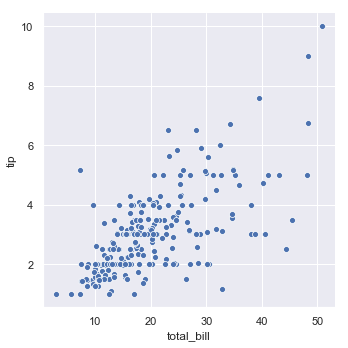

In [12]:
sns.relplot(x="total_bill", y="tip", data=tips); #2d scatter plot

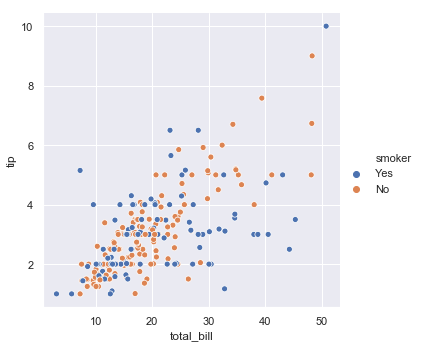

In [11]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips); #3d color adds new info 

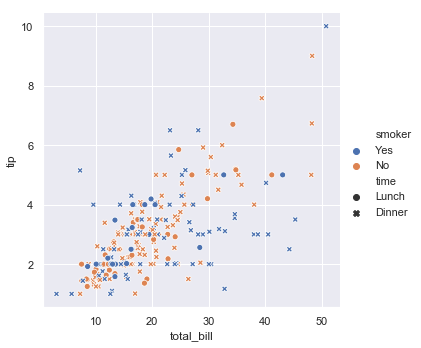

In [13]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips); #4d style changes marker {x,y,color,marker}

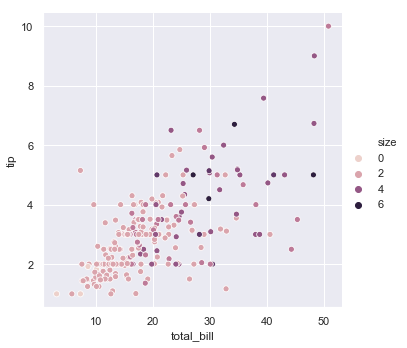

In [14]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips); #variation in color

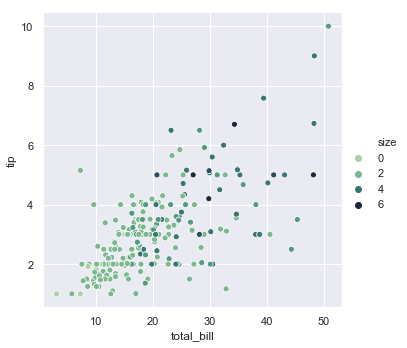

In [16]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips); #playing with color see 
#https://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html#seaborn.cubehelix_palette   still figuring out the string

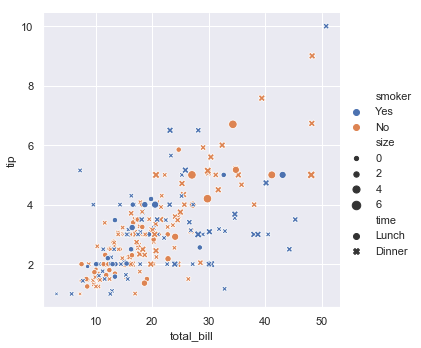

In [17]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", size="size",data=tips); #5d size has a size!!!

       time     value
0  1.220274  0.692659
1  0.705392  1.221257
2  0.449669  1.887744
3  1.280130  1.848300
4  1.670731  2.291226


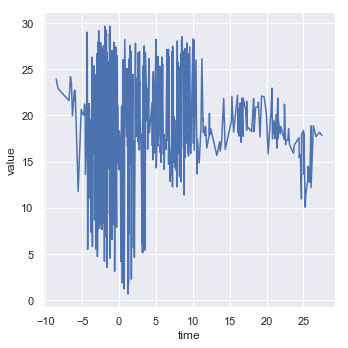

In [27]:
#moving to lines

#generate some continuous data
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["time", "value"])
print(df.head())

sns.relplot(x="time", y="value", kind="line", data=df) #make relplot continuous by setting kind="line"
#theres a problem with this graph


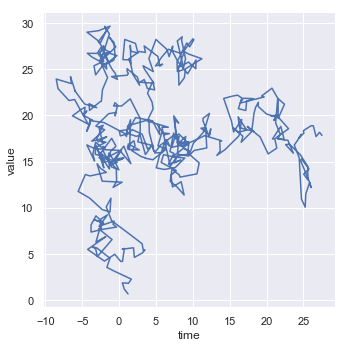

In [29]:
#relplot automatically sorts the x-value. time might want to be plotted in the order of the df
sns.relplot(x="time", y="value", sort=False, kind="line", data=df);

  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970
5      s9         18  stim  parietal -0.103513
6      s8         18  stim  parietal -0.064408
7      s7         18  stim  parietal -0.060526
8      s6         18  stim  parietal -0.007029
9      s5         18  stim  parietal -0.040557 

(1064, 5)
subject
s0     76
s1     76
s10    76
s11    76
s12    76
s13    76
s2     76
s3     76
s4     76
s5     76
s6     76
s7     76
s8     76
s9     76
dtype: int64


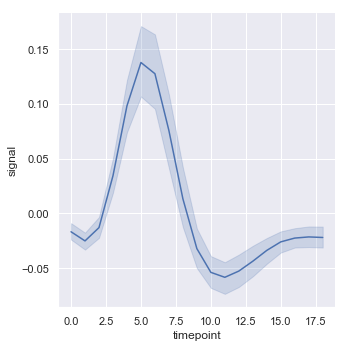

In [36]:
#multiple measurements of a variable
fmri = sns.load_dataset("fmri")
print(fmri.head(10),'\n')
print(fmri.shape)
dups_color = fmri.pivot_table(index=['subject'], aggfunc='size')
print (dups_color)
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);  #can disable confidence intervals use ci=None (or sd for standard dev)

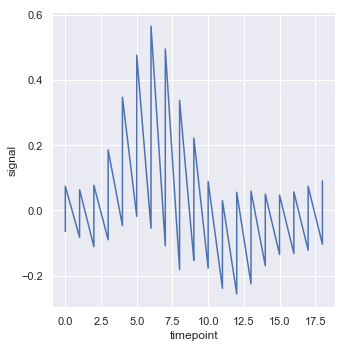

In [37]:
#no aggregation, show me what I have aka sns, stop being smart!
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

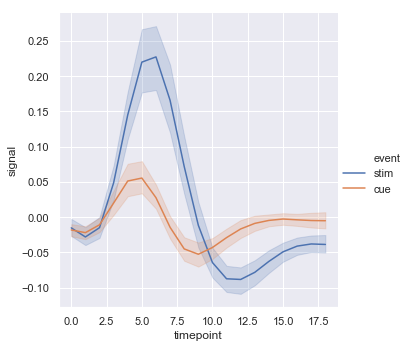

In [38]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri); #two lines, notice difference from scatterplot

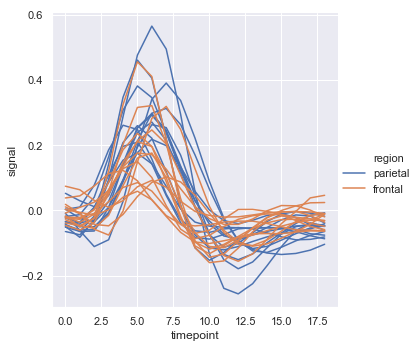

In [39]:
#plot each repeated subject separately
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"));

#Can do a lot with color formatting, see link in the beginning of notebook

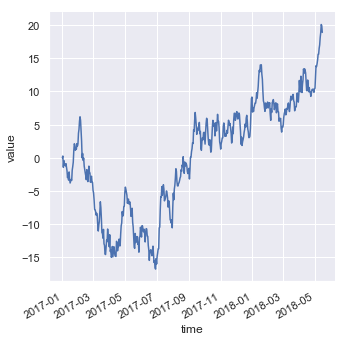

In [41]:
#sns is based on matplotlib--> works well with dates 
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500), value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

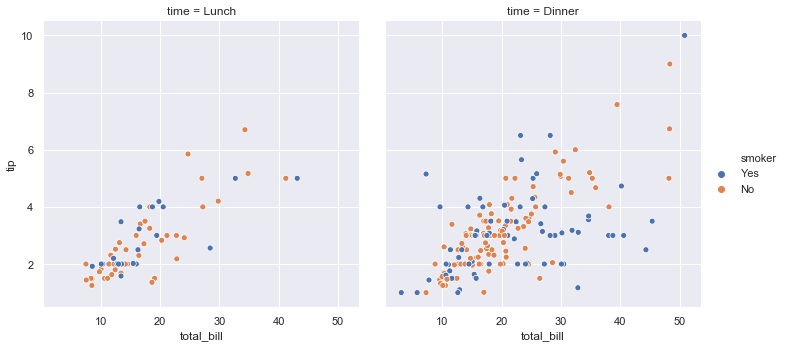

In [42]:
#too much data 
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970


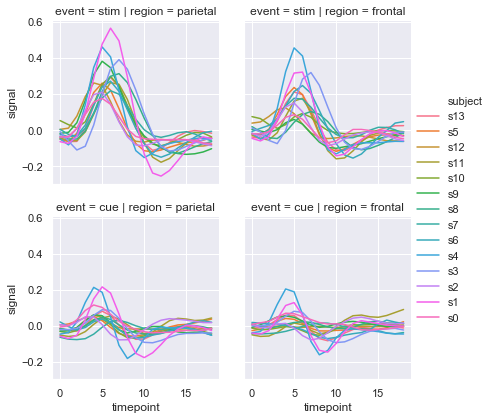

In [46]:
print(fmri.head())
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region",row="event", height=3,
            kind="line", estimator=None, data=fmri);

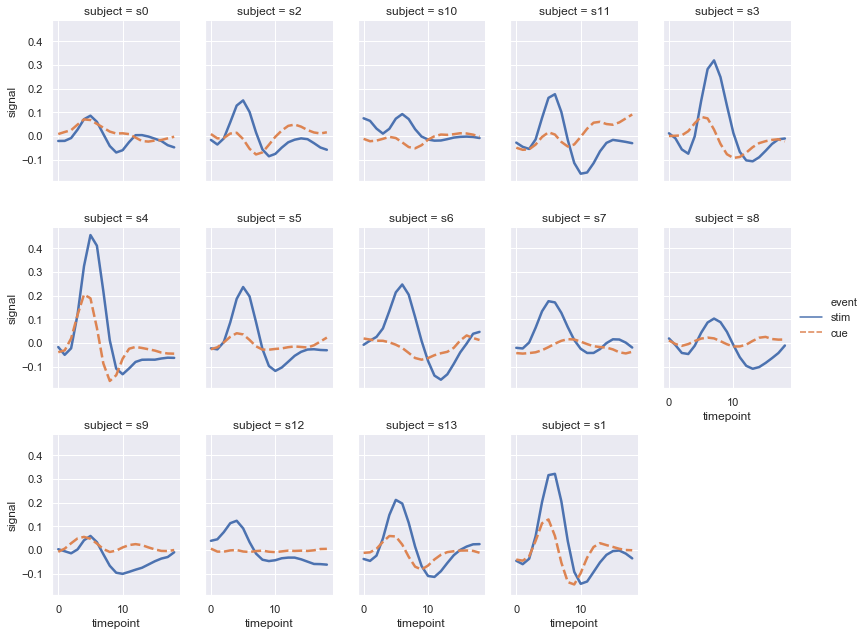

In [44]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

In [ ]:
#Topic 2: Plotting with categorical data
#https://seaborn.pydata.org/tutorial/categorical.html

In [ ]:
#Categorical scatterplots

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


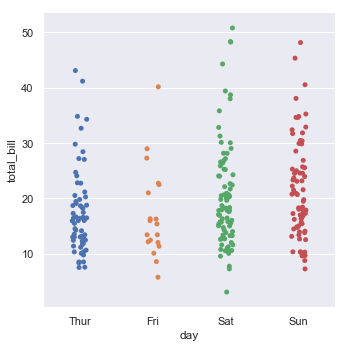

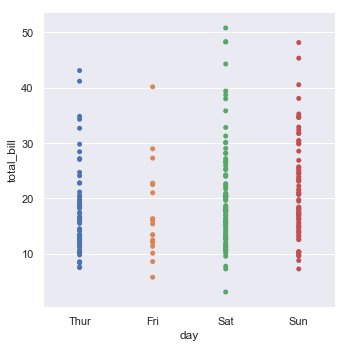

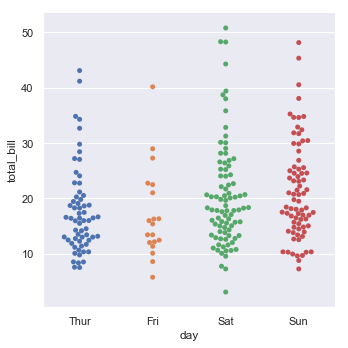

In [7]:
tips = sns.load_dataset("tips")
print(tips.head())
sns.catplot(x="day", y="total_bill", data=tips);   #uses random jitter to make plots pretty
sns.catplot(x="day", y="total_bill",jitter=False, data=tips); #overlapping points --ugly
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

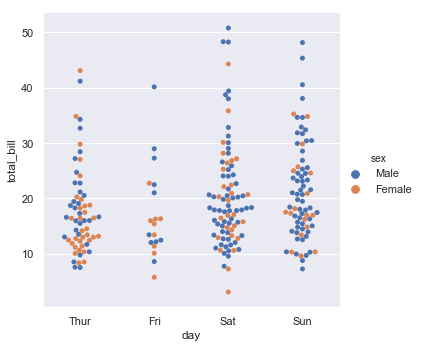

In [8]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips) #on sunday men pay more than women

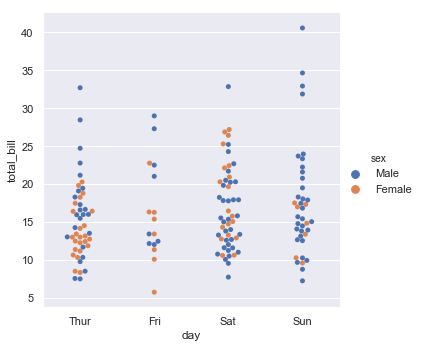

In [11]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips.query("size == 2"))#weekend dates, who pays?

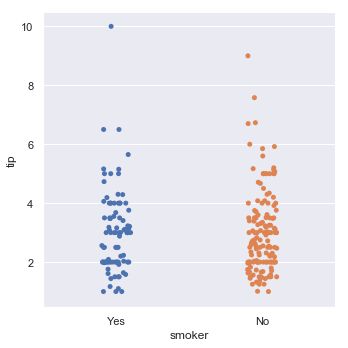

In [12]:
# Does smoking affect tips?
sns.catplot(x="smoker", y="tip", data=tips);

In [ ]:
#Distributions of observations within categories
#can't use scatter plots anymore if dataset too large
#might want more informations than just dots

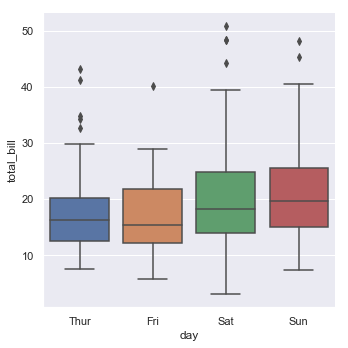

In [13]:
#box plot
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

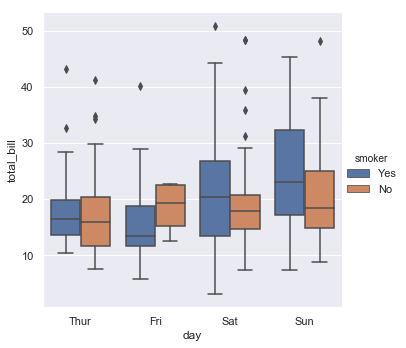

In [14]:
#adding extra dimensions
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

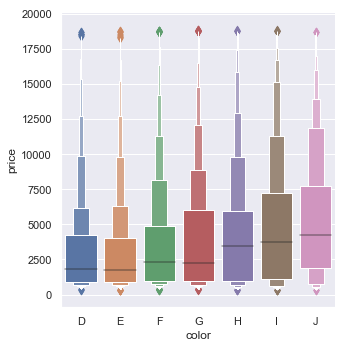

In [15]:
#boxen plot--box plot with more quartiles
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"));

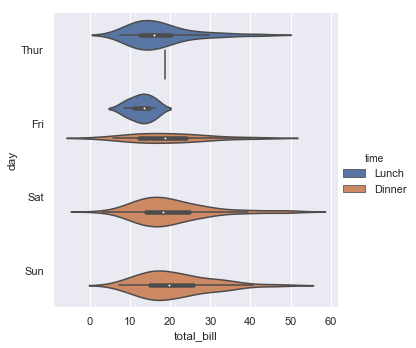

In [16]:
#Violin plot--fancy extension of box plot
sns.catplot(x="total_bill", y="day", hue="time",  kind="violin", data=tips);

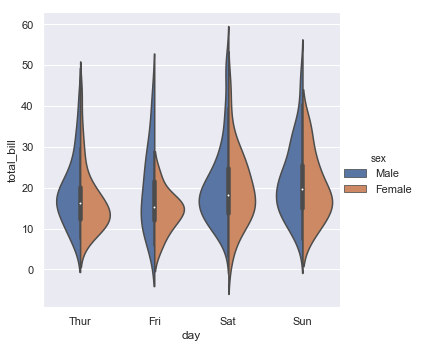

In [17]:
#can split violins --better than having two boxplots
sns.catplot(x="day", y="total_bill", hue="sex",kind="violin", split=True, data=tips);

In [ ]:
#plenty more about violin plots on the link

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


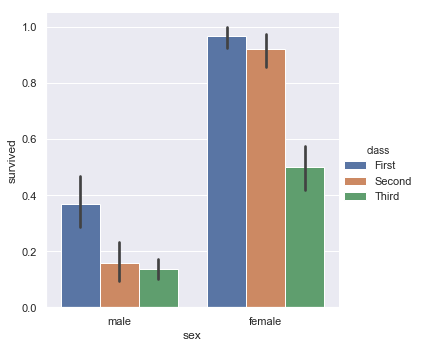

In [19]:
#Statistical estimation within categories
titanic = sns.load_dataset("titanic")
print(titanic.head())

#bar chart
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

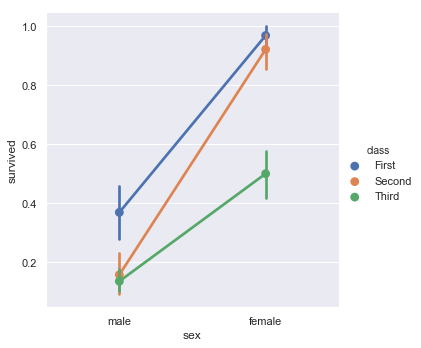

In [20]:
#point plot: same as bar chart but no bars and lines connect bars
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic);

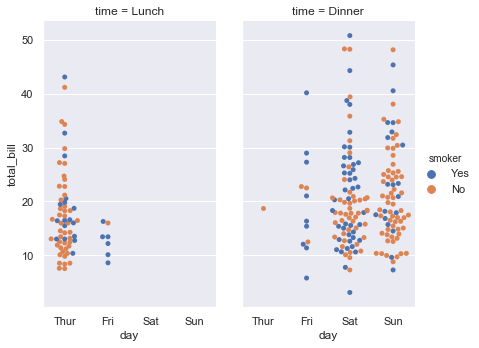

In [22]:
#more splitting
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips);

In [ ]:
#Visualizing the distribution of a dataset
#https://seaborn.pydata.org/tutorial/distributions.html#         Ileft out most examples

In [23]:
from scipy import stats

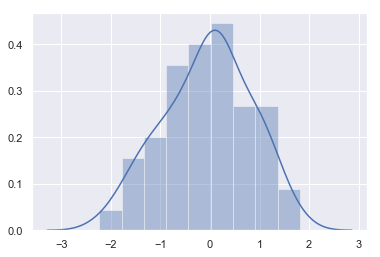

In [24]:
#histogram/ point plot
x = np.random.normal(size=100)
sns.distplot(x);

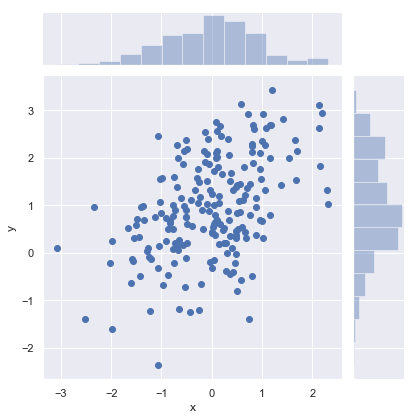

In [25]:
#scatter plots with a twist
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

sns.jointplot(x="x", y="y", data=df);

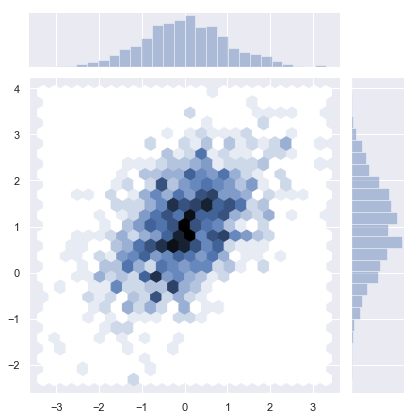

In [28]:
#hexplot, histogram in 2d,  how many points fall into a region
x, y = np.random.multivariate_normal(mean, cov, 1000).T
sns.jointplot(x=x, y=y, kind="hex")

          x         y
0  0.481397  0.368925
1  1.166209  1.993032
2 -0.522348  0.756430
3 -0.723759  0.911483
4 -0.679397  2.002865


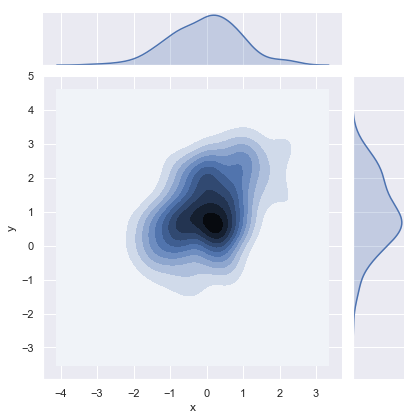

In [30]:
#kernel density estimation using contour plots
print(df.head())
sns.jointplot(x="x", y="y", data=df, kind="kde"); #estimates probabilty density
#theres a lot more on the website, also can merge with matlplotlip, fig, ax=plt.dubsplot(nrows,ncols)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


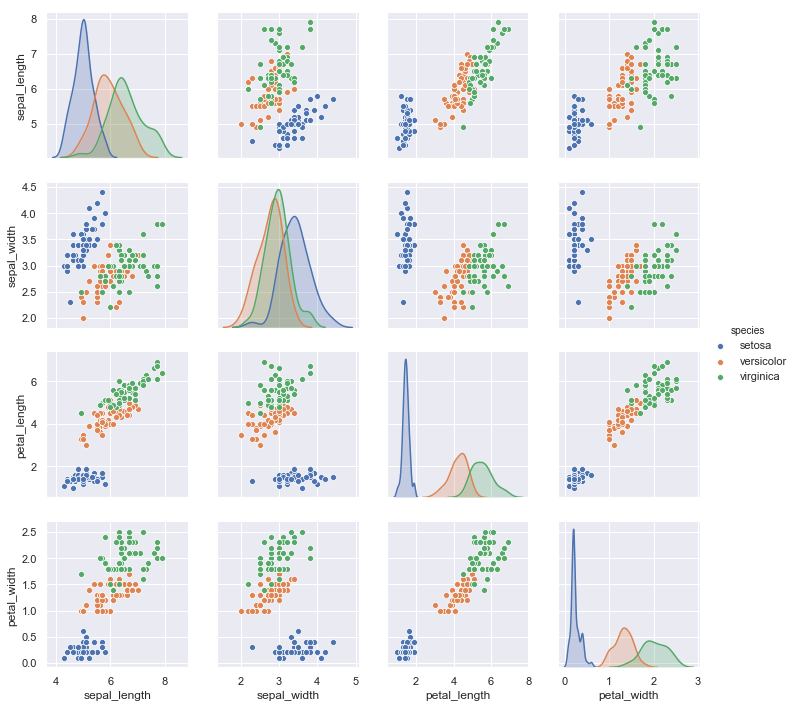

In [36]:
#plot each column against eachother
iris = sns.load_dataset("iris")
print(iris.head())
sns.pairplot(iris,hue='species');

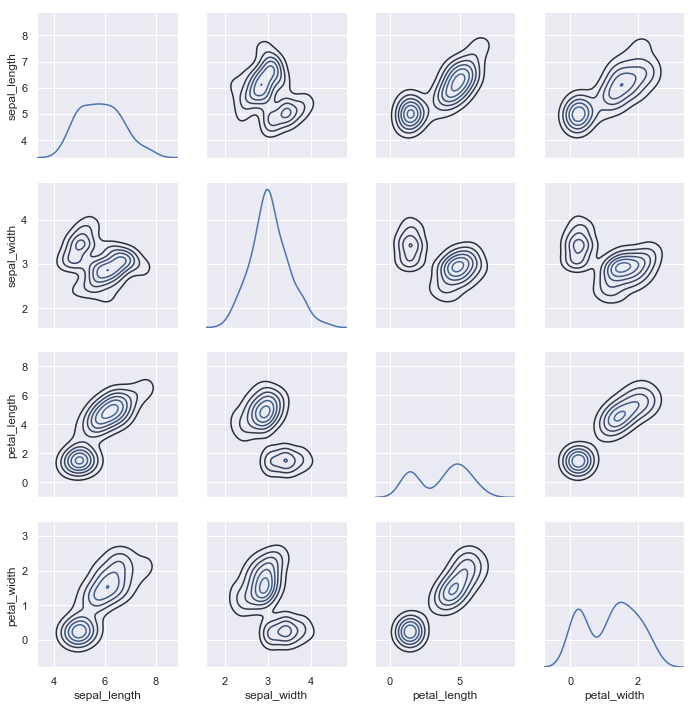

In [37]:
#misleading plot, looks as if only two species. take seaborn with a grain of salt
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

In [ ]:
#Visualizing linear relationships
#https://seaborn.pydata.org/tutorial/regression.html

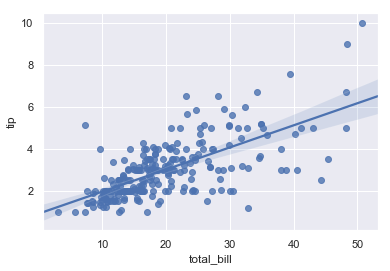

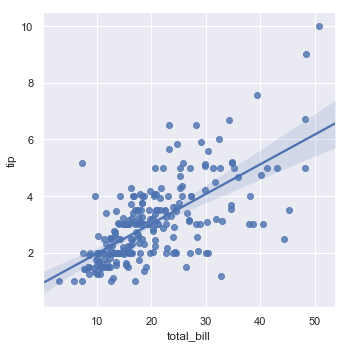

In [39]:
#Regression plot

sns.regplot(x="total_bill", y="tip", data=tips);
sns.lmplot(x="total_bill", y="tip", data=tips); #similar but x and y are 'tidy data'--flexible format

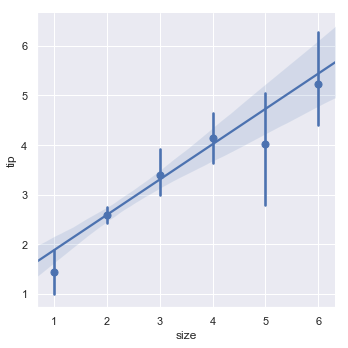

In [42]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean); #kind of like error bars

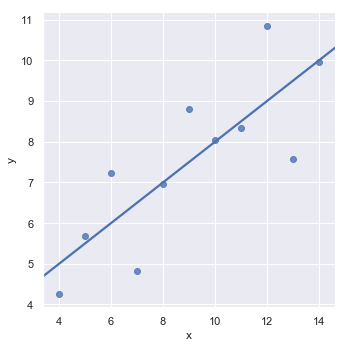

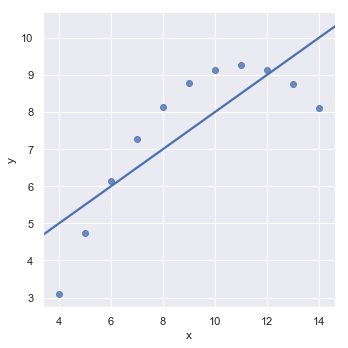

In [45]:
#Would you use linear regression?
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),ci=None)
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),ci=None)

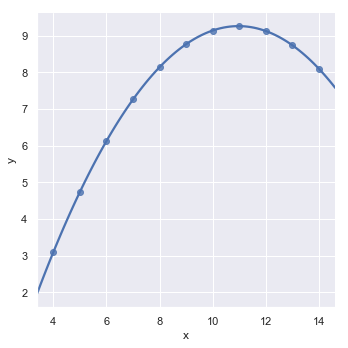

In [46]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),order=2, ci=None) #quadratic fit

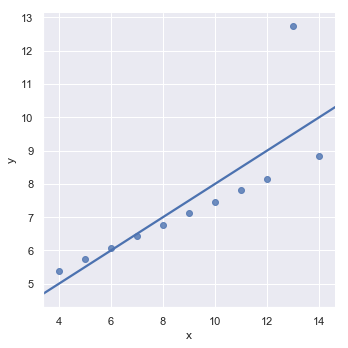

In [47]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),ci=None) # remoce the outlier before applying regression

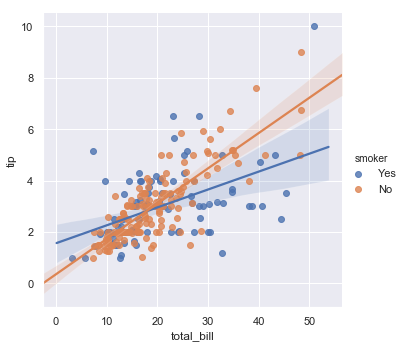

In [48]:
#finding relationships faster
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);